In [ ]:
import tensorflow as tf
import matplotlib
import cv2
import numpy as np
from tensorflow.keras import layers, models
from google.colab import files
import zipfile
import os
import shutil
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the file folder from the zipfile from mydrive
with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", "r") as zip_ref:
  zip_ref.extractall("/content/3D_Object_Recognition_Data")

In [ ]:
# Check the files in the folder
!ls /content/3D_Object_Recognition_Data

annotations  images  metadata.csv


In [ ]:
# Display the image data
!ls /content/3D_Object_Recognition_Data/images/

01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
16654_1_1.png
16654_2_1.jpg
16654_4_1.jpg
16660_1_1.jpg
16660_2_1.jpg
16660_3_1.jpg
16660_4_1.jpg
16660_5_1.jpg
16663_1_1.jpg
16663_1_2.jpg
16664_1_1.jpg
16664_2_1.jpg
16669_1_1.jpeg
16669_3_1.jpeg
16672_1_1.jpg
16673_2_1.jpg
16674_1_1.jpg
16691_1_1.jpg
16706_1_1.png
16708_1_1.jpg
16708_4_1.jpg
16708_5_1.jpg
16724_1_1.jpg
171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg
191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg
1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png
1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.p

In [ ]:
image_list = []
image_dir = "/content/3D_Object_Recognition_Data/images/"
for file in os.listdir(image_dir):
  image = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_list.append(image_rgb)
  print(image_list)

Streaming output truncated to the last 5000 lines.

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[40, 40, 40],
        [44, 44, 44],
        [41, 41, 41],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[22, 22, 22],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]],

       [[20, 20, 20],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[20, 20, 20],

In [ ]:
print(image.shape)

(913, 994, 3)


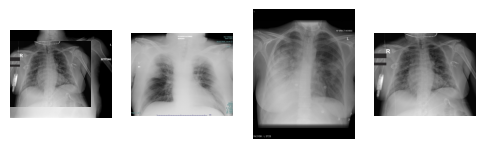

In [ ]:
# Visualize the images
plt.figure(figsize=(6,7))
for i in range(min(4, len(image_list))):
  plt.subplot(1,4,i+1)
  plt.imshow(image_list[i])
  plt.axis("off")
  plt.subplot(1,5,1)
  plt.imshow(image_list[i])
  plt.axis("off")
plt.show()

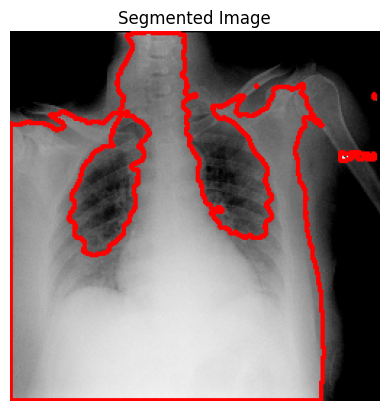

In [45]:
processed_images = []

for image in image_list:
    # Resize image using opencv
    resized_image = cv2.resize(image, (255,255))

    # Denoise the resized image
    denoised_image = cv2.GaussianBlur(resized_image, (5,5), 0)

    # To segment the image
    _, segmented_image = cv2.threshold(denoised_image, 100, 255, cv2.THRESH_BINARY)

    # Convert the segmented image to grayscale before finding contours
    segmented_image_gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

    # To find the contour around the segmented image
    contours, _ = cv2.findContours(segmented_image_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Convert resized image to grayscale before drawing contours and then back to RGB for display
    resized_image_gray = cv2.cvtColor(resized_image.copy(), cv2.COLOR_BGR2GRAY)
    image_with_contours = cv2.cvtColor(resized_image_gray, cv2.COLOR_GRAY2RGB)

    # To draw the image contours on the resized image
    cv2.drawContours(image_with_contours, contours, -1, (255,0,0), 2)

    processed_images.append(image_with_contours)

# Display the first processed image as an example
if processed_images:
    plt.imshow(processed_images[0])
    plt.title("Segmented Image")
    plt.axis("off")
    plt.show()
else:
    print("No images were processed.")